In [1]:
#pip install pulsee

In [2]:
import sys
import os

import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from operators import CLEAN_1000, CLEAN_0100, CLEAN_0010, CLEAN_0001, RHO_1000, RHO_0100, RHO_0010, RHO_0001, IDENTITY, Ix, Iy, Iz, Sx, Sy, Sz, IxSx, IxSy, IxSz, IySx, IySy, IySz, IzSx, IzSy, IzSz

In [3]:
HAD_I= op.Rx_I(np.pi) * op.Ry_I(np.pi / 2)
HAD_S= op.Rx_S(np.pi) * op.Ry_S(np.pi / 2)
spin_up = qt.states.basis(2, 0) 
spin_down = qt.states.basis(2, 1) 
spin_plus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) + qt.states.basis(2, 1)) 
spin_minus = (1/np.sqrt(2)) * (qt.states.basis(2, 0) - qt.states.basis(2, 1)) 
#pseudo_CNOT_I = op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) 
#pseudo_CNOT_S = op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2) 
id = qt.identity(2)
pi = np.pi

CNOT_I = op.Rz_I(np.pi / 2) * op.Rz_S(-np.pi / 2) * op.Rx_S(np.pi / 2) * op.UJ * op.Ry_S(np.pi / 2) 
CNOT_S=op.Rz_S(np.pi / 2) * op.Rz_I(-np.pi / 2) * op.Rx_I(np.pi / 2) * op.UJ * op.Ry_I(np.pi / 2)

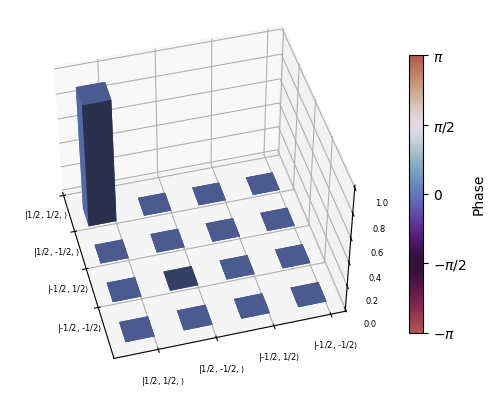

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [4]:
pi_0= CLEAN_1000
psplt.plot_complex_density_matrix(pi_0)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]

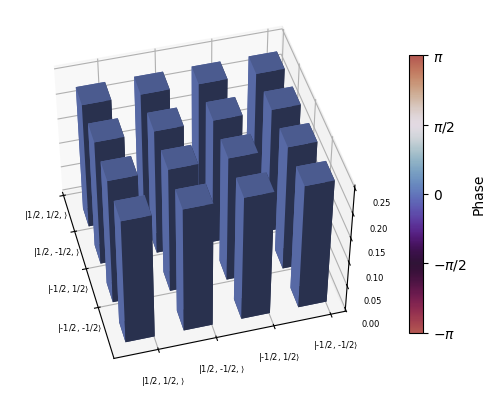

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [5]:
pi_1_simulation=HAD_I * HAD_S * pi_0 * HAD_S.dag() * HAD_I.dag()
display(pi_1_simulation)
psplt.plot_complex_density_matrix(pi_1_simulation)

State vector after applying the oracle:
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.5]
 [ 0.5]
 [ 0.5]
 [-0.5]]

Density matrix after applying the oracle:
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25 -0.25]
 [-0.25 -0.25 -0.25  0.25]]


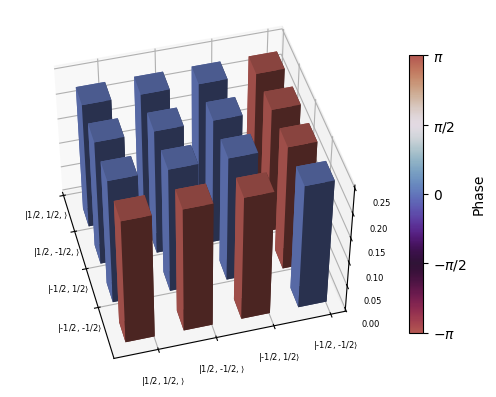

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [6]:
I = qt.qeye(2)
Y = qt.sigmay()
Z = qt.sigmaz()

zero = qt.basis(2, 0)  
one = qt.basis(2, 1)  
ket_00 = qt.tensor(zero, zero)
ket_01 = qt.tensor(zero, one)
ket_10 = qt.tensor(one, zero)
ket_11 = qt.tensor(one, one)

psi_1 = (ket_00 + ket_01 + ket_10 + ket_11).unit()
rho_1 = qt.ket2dm(psi_1) 

oracle = qt.tensor(I, I) - 2 * ket_11 * ket_11.dag()

psi_2 = oracle * psi_1  
rho_2 = qt.ket2dm(psi_2)  

print("State vector after applying the oracle:\n", psi_2)
print("\nDensity matrix after applying the oracle:")
print(rho_2)

psplt.plot_complex_density_matrix(rho_2)


State vector after applying the diffusion operator:
 Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [-1.]]

Density matrix after applying the diffusion operator:
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]


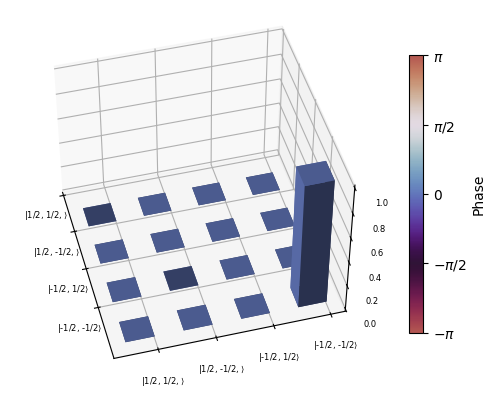

(<Figure size 640x480 with 2 Axes>, <Axes3D: >)

In [7]:
X = qt.sigmax()

psi_2 = oracle * psi_1  

H = (1/np.sqrt(2)) * (X + qt.sigmaz()) 
H2 = qt.tensor(H, H) 

psi_h = H2 * psi_2

U_flip = qt.tensor(I, I) - 2 * ket_00 * ket_00.dag()

psi_flip = U_flip * psi_h

psi_3 = H2 * psi_flip

rho_3 = qt.ket2dm(psi_3) 

print("State vector after applying the diffusion operator:\n", psi_3)
print("\nDensity matrix after applying the diffusion operator:")
print(rho_3)

psplt.plot_complex_density_matrix(rho_3) 
